Calculate price inflation by product category from Amazon data

Hypothesis: price inflation is much greater than fed numbers

## Approach:
Aggregate prices by ASIN/category/date. Resample by month to smooth. 

Set Jan 2020 = 100 and index 

Try equal weighted version (mean, median) to find categories that have biggest changes

More complex, weight by product rank (1/rank), or by power law

Aggregate up to categories and subcategories

Put into Tableau boxplot (public) for alphascientist


In [2]:
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

In [2]:
folder_path = '/Users/Chad/data/amazon/ranks_by_date/'
filename = os.listdir(folder_path)[10]
filename

'20210422.jl'

In [3]:
filepath = os.path.join(folder_path,filename)

df = pd.read_json(filepath,lines=True)
df['date'] = pd.to_datetime(df.crawl_date).dt.strftime('%Y-%m-%d')
tmp = df.groupby(['date','asin','cat',])['price'].mean().unstack().unstack()#.count(axis=1)


NameError: name 'folder_path' is not defined

In [93]:

key_cats = ['health-personal-care-products','appliances','magazines','toys-games','computers-accessories','automotive',
'home-kitchen']

df.cat.value_counts().head(30)


                                                      362
health-personal-care-products                         197
mp3-downloads                                         175
home-kitchen-storage-organization                     148
home-kitchen-vacuum-cleaners-floor-care               100
kindle-store-content-newsstand                        100
gift-cards-store                                      100
toys-games-dress-up-pretend-play                      100
boys-fashion                                          100
baby-clothing-shoes                                   100
cell-phone-cases-covers                               100
beauty-perfumes-fragrances                            100
toys-games-puzzles                                    100
kindle-store-whispersync-voice                        100
appliances                                            100
home-improvement-appliances                           100
magazines                                             100
musical-instru

In [4]:
folder_path = '/Users/Chad/data/amazon/ranks_by_date/'
filenames = [file for file in os.listdir(folder_path) if '.jl' in file]
filenames

['20201029.jl',
 '20200122.jl',
 '20200708.jl',
 '20210308.jl',
 '20201108.jl',
 '20201008.jl',
 '20200224.jl',
 '20210208.jl',
 '20200608.jl',
 '20210422.jl',
 '20201129.jl',
 '20210329.jl',
 '20200729.jl',
 '20200815.jl',
 '20200722.jl',
 '20201122.jl',
 '20210322.jl',
 '20201201.jl',
 '20200401.jl',
 '20210508.jl',
 '20200415.jl',
 '20201215.jl',
 '20200801.jl',
 '20210429.jl',
 '20200901.jl',
 '20200129.jl',
 '20210115.jl',
 '20200515.jl',
 '20200501.jl',
 '20210408.jl',
 '20210101.jl',
 '20210222.jl',
 '20201022.jl',
 '20200622.jl',
 '20200915.jl',
 '20200601.jl',
 '20201001.jl',
 '20210201.jl',
 '20210122.jl',
 '20201015.jl',
 '20210215.jl',
 '20200922.jl',
 '20200615.jl',
 '20200715.jl',
 '20200822.jl',
 '20210315.jl',
 '20200228.jl',
 '20201115.jl',
 '20200513.jl',
 '20200422.jl',
 '20201222.jl',
 '20200309.jl',
 '20210301.jl',
 '20201101.jl',
 '20201229.jl',
 '20200302.jl',
 '20200429.jl',
 '20200908.jl',
 '20210415.jl',
 '20200203.jl',
 '20200104.jl',
 '20210108.jl',
 '202104

In [5]:
folder_path = '/Users/Chad/data/amazon/ranks_by_date/'
filenames = [file for file in os.listdir(folder_path) if '.jl' in file]

res_lst = []
wts_lst = []
brands_lst = []
for filename in tqdm(filenames):
    try:
        filepath = os.path.join(folder_path,filename)
        df = pd.read_json(filepath,lines=True)
        df['date'] = pd.to_datetime(df.crawl_date).dt.strftime('%Y-%m-%d')
        prices = df.groupby(['date','asin','cat',])['price'].mean()#.unstack().unstack()#.count(axis=1)
        res_lst.append(prices)
        wts = (1/(df.groupby(['date','asin','cat',])['rank'].mean()+1))**0.5
        wts_lst.append(wts)
    except:
        pass


In [6]:
df

,session_id,cat,crawl_date,crawl_source,spider,rank,product_name,product_url,image_url,avg_rating,asin,review_url,num_ratings,price,date
0,20210129T010702,amazon-devices,2021-01-29T01:07:34,amazon.com,amazon_index_l1b,1,Fire TV Stick 4K streaming device with Alexa V...,www.amazon.com//Fire-TV-Stick-4K-with-Alexa-Vo...,https://images-na.ssl-images-amazon.com/images...,4.7,B07GZFM1ZM,https://www.amazon.com/product-reviews/B07GZFM...,508061,49.99,2021-01-29
1,20210129T010702,amazon-devices,2021-01-29T01:07:34,amazon.com,amazon_index_l1b,2,Fire TV Stick Lite with Alexa Voice Remote Lit...,www.amazon.com//fire-tv-stick-lite/dp/B07YNLBS...,https://images-na.ssl-images-amazon.com/images...,4.7,B08F9ZCTCL,https://www.amazon.com/product-reviews/B08F9ZC...,81733,21.99,2021-01-29
2,20210129T010702,amazon-devices,2021-01-29T01:07:34,amazon.com,amazon_index_l1b,3,Fire TV Stick with Alexa Voice Remote (include...,www.amazon.com//fire-tv-stick-with-alexa-voice...,https://images-na.ssl-images-amazon.com/images...,4.8,B08FB3XVT7,https://www.amazon.com/product-reviews/B08FB3X...,88832,39.99,2021-01-29
3,20210129T010702,amazon-devices,2021-01-29T01:07:34,amazon.com,amazon_index_l1b,5,Echo Show 5 -- Smart display with Alexa – stay...,www.amazon.com//Introducing-Echo-Show-Compact-...,https://images-na.ssl-images-amazon.com/images...,4.6,B07RCMTLHD,https://www.amazon.com/product-reviews/B07RCMT...,290823,44.99,2021-01-29
4,20210129T010702,amazon-devices,2021-01-29T01:07:34,amazon.com,amazon_index_l1b,6,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",www.amazon.com//All-New-Echo-Dot-4th-Gen/dp/B0...,https://images-na.ssl-images-amazon.com/images...,4.7,B08F1P3BCC,https://www.amazon.com/product-reviews/B08F1P3...,119505,49.99,2021-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38069,20210129T010702,arts-crafts-sewing-beading-jewelry-making,2021-01-29T01:29:11,amazon.com,amazon_index_l1b,96,"Necklace Extenders, 10Pcs Stainless Steel Gold...",www.amazon.com//Necklace-Extenders-Stainless-B...,https://images-na.ssl-images-amazon.com/images...,4.4,B08V88LHCM,https://www.amazon.com/product-reviews/B08V88L...,1583,6.99,2021-01-29
38070,20210129T010702,arts-crafts-sewing-beading-jewelry-making,2021-01-29T01:29:11,amazon.com,amazon_index_l1b,97,Chenkou Craft 3000PCS 1 Box Beige Round Flatba...,www.amazon.com//Chenkou-Craft-3000PCS-Flatback...,https://images-na.ssl-images-amazon.com/images...,4.6,B07RHGS3QV,https://www.amazon.com/product-reviews/B07RHGS...,760,9.99,2021-01-29
38071,20210129T010702,arts-crafts-sewing-beading-jewelry-making,2021-01-29T01:29:11,amazon.com,amazon_index_l1b,98,"18 Pieces Beading Needles, 6 Sizes Seed Beads ...",www.amazon.com//Beading-Needles-Embroidery-Col...,https://images-na.ssl-images-amazon.com/images...,4.5,B07S8S5RBX,https://www.amazon.com/product-reviews/B07S8S5...,780,5.99,2021-01-29
38072,20210129T010702,arts-crafts-sewing-beading-jewelry-making,2021-01-29T01:29:11,amazon.com,amazon_index_l1b,99,"ORTUR Laser Master 2, Laser Engraver CNC, Lase...",www.amazon.com//ORTUR-Laser-Master-Engraving-M...,https://images-na.ssl-images-amazon.com/images...,4.2,B08TT83213,https://www.amazon.com/product-reviews/B08TT83...,500,287.99,2021-01-29


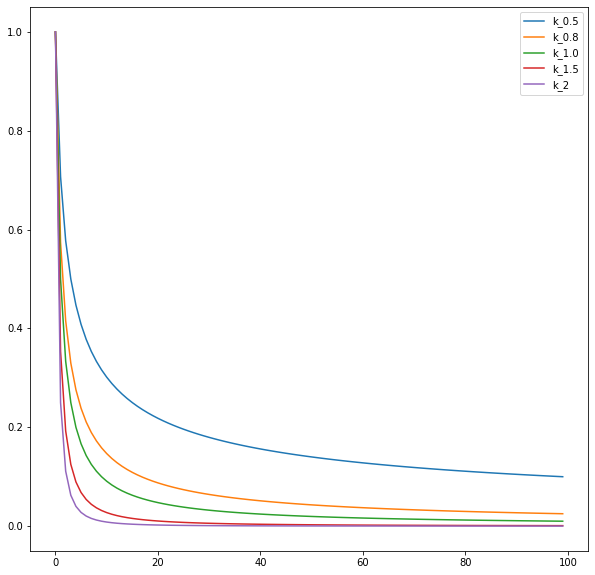

In [166]:
s = pd.Series(np.arange(1,101))

for k in [0.5,0.8,1.0,1.5,2]:
    ((1/(s))**k).rename(f'k_{k}').plot(legend=True,figsize=(10,10))

In [6]:
price_by_cat = pd.concat(res_lst,axis=0)

In [62]:
wts_by_cat = pd.concat(wts_lst,axis=0)

In [153]:
wts_by_cat

date        asin        cat                    
2020-10-29  0060935464  books-amazon               0.012821
            0061953385  arts-crafts-sewing-yarn    0.011765
            0062187708  books-amazon               0.010870
            0062868934  books-amazon               0.010989
            0064431789  books-amazon               0.014493
                                                     ...   
2021-01-29  BT00CTP7SK  gift-cards-teens           0.010309
            BT00CTP8P2  gift-cards-teens           0.021277
            BT00CTP8T8  gift-cards-teens           0.010989
            BT00CTP93I  gift-cards-teens           0.013514
            BT00CTPCO4  gift-cards-teens           0.015152
Name: rank, Length: 2702270, dtype: float64

In [9]:
cats = price_by_cat.index.get_level_values('cat').unique()
cats

Index(['books-amazon', 'arts-crafts-sewing-yarn',
       'electronics-accessories-supplies',
       'industrial-scientific-science-education-supplies',
       'arts-crafts-sewing-scrapbooking-photo-transfer-coloring',
       'office-products-education-supplies-craft', 'toys-games-building',
       'sports-collectibles-collectible-publications-media',
       'sports-collectibles-collectible-books', 'toys-games-puzzles',
       ...
       'entertainment-collectibles-collectible-cut-signatures',
       'entertainment-collectibles-collectible-plates',
       'garden-outdoor-storage', 'automotive-lights-bulbs-indicators',
       'entertainment-collectibles-collectible-postcards',
       'amazon-launchpad-star-store', 'amazon-launchpad-all-gifts',
       'amazon-launchpad-new-releases', 'audible-audiobooks-travel-tourism',
       'amazon-launchpad-shark-tank-collection'],
      dtype='object', name='cat', length=536)

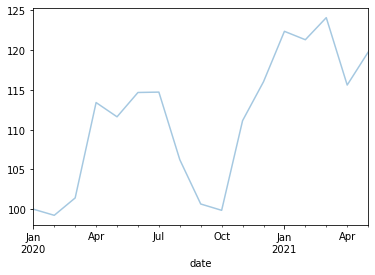

In [35]:
def simple_indexing(prices):
    ''' uses first period as 100. Excludes any items not present in first period.
    An improved method relies on chaining of period to period changes'''
    
    return (prices.divide(prices.iloc[0,:],axis=1) * 100).mean(axis=1)
    
simple_indexing(df).plot(alpha=0.4)

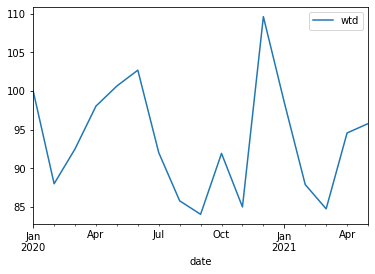

In [100]:
def simple_indexing(prices, weights = None):
    ''' uses first period as 100. Excludes any items not present in first period.
    An improved method relies on chaining of period to period changes'''
    
    if weights is None:
        out = (prices.divide(prices.iloc[0,:],axis=1).replace({0.:None}) * 100).mean(axis=1)
    else:
        indexed = (prices.divide(prices.iloc[0,:],axis=1) * 100)
        weights = weights[indexed>0] # only allows weights where greater
        weights = weights.divide(weights.sum(axis=1),axis=0)
        out = (indexed * weights).sum(axis=1)
    
    return out
    
tmp = df.divide(df.iloc[0,:],axis=1) * 100
tmp.divide(tmp.sum(axis=1),axis=0)

simple_indexing(df, wts).rename('wtd').plot(legend=True)


In [132]:
import numpy as np
tmp.apply(np.log)

asin,B0000CF98Q,B001CH0ZLE,B0055521W0,B00NLLUKZA,B00U8QEXBS,B013IJPTFK,B01HNJEYBQ,B01IHHLB3W,B01NBTD4Q8,B074P9Q7PJ,...,B07RY3PMX8,B07SPYC5K6,B087P9Y47R,B088DTJT6D,B01LXEQ6UM,B07QKYY8CQ,B07T73WZS6,B07WNY51RG,B07ZD33NF6,B08S3YWW2S
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,NaN,NaN,NaN,4.605170,4.605170,4.60517,NaN,4.605170,4.605170,4.605170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,4.60517,NaN,4.614747,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,NaN,NaN,NaN,NaN,NaN,4.60517,NaN,4.620449,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-30,NaN,NaN,NaN,4.616806,4.558718,NaN,NaN,4.655828,4.425302,4.521754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,4.729352,4.184943,NaN,NaN,4.679333,4.456885,4.564332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,NaN,NaN,NaN,4.804931,4.003818,NaN,NaN,4.679333,4.456885,4.488587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-31,NaN,NaN,NaN,4.804931,3.906648,NaN,NaN,4.679333,4.439072,4.477282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,4.804931,3.766886,NaN,NaN,4.628002,4.433063,4.440224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN,4.822966,3.968307,NaN,NaN,4.679333,NaN,4.396330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


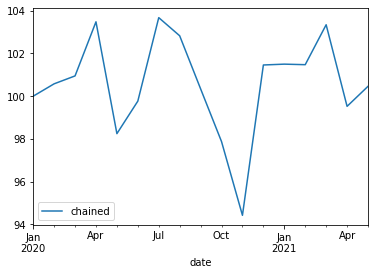

In [152]:
def chained_indexing(prices, weights):
    ''' uses first period as 100. Excludes any items not present in first period.
    An improved method relies on chaining of period to period changes'''
    
    raw_changes = prices.divide(prices.shift(1)).subtract(1)
    weights = weights[raw_changes.notnull()] # only allows weights where greater
    weights = weights.divide(weights.sum(axis=1),axis=0)
    wtd_changes = raw_changes * weights
    
    out = wtd_changes.sum(axis=1).add(1).multiply(100)
    
    return out
    
chained_indexing(df, wts).rename('chained').plot(legend=True)


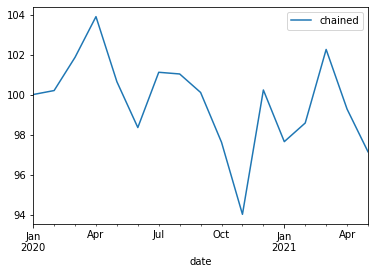

In [182]:
def chained_indexing(prices, weights):
    ''' implemented with logs '''
    
    raw_changes = prices.apply(np.log).diff().cumsum()
    weights = weights[raw_changes.notnull()] # only allows weights where greater
    weights = weights.divide(weights.sum(axis=1),axis=0)
    wtd_changes = raw_changes * weights
    
    out = wtd_changes.sum(axis=1).add(1).multiply(100)
    
    return out
    
chained_indexing(df, wts).rename('chained').plot(legend=True)


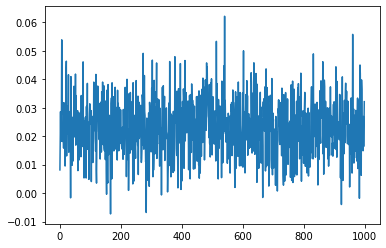

In [177]:
import numpy as np
s = pd.Series(np.random.randn(1000)/100).add(1)
np.log(s).diff().cumsum().apply(np.exp).subtract(1).plot()

In [116]:
appliances = [cat for cat in cats if 'appliances' in cat]
health = [cat for cat in cats if 'health' in cat]

In [179]:
res = []
for cat in health[:3]:
    df = price_by_cat.xs(cat,level='cat').unstack()
    avg_prods = df.count(axis=1).mean()
    if avg_prods<50:
        print(f'only {avg_prods} products. skipping')
        continue
    
    df.index = pd.to_datetime(df.index)
    df = df.resample('M').mean()
    
    wts = wts_by_cat.xs(cat, level='cat').unstack()
    wts.index = pd.to_datetime(wts.index)
    wts = wts.resample('M').mean()

#     s = simple_indexing(df, wts).rename(cat)
    s = chained_indexing(df, wts).rename(cat)
    res.append(s)

In [183]:
res = []
for cat in health[:3]:
    df = price_by_cat.xs(cat,level='cat').unstack()
    avg_prods = df.count(axis=1).mean()
    if avg_prods<50:
        print(f'only {avg_prods} products. skipping')
        continue
    
    df.index = pd.to_datetime(df.index)
    df = df.resample('M').mean()
    
    wts = wts_by_cat.xs(cat, level='cat').unstack()
    wts.index = pd.to_datetime(wts.index)
    wts = wts.resample('M').mean()

#     s = simple_indexing(df, wts).rename(cat)
    s = chained_indexing(df, wts).rename(cat)
    res.append(s)

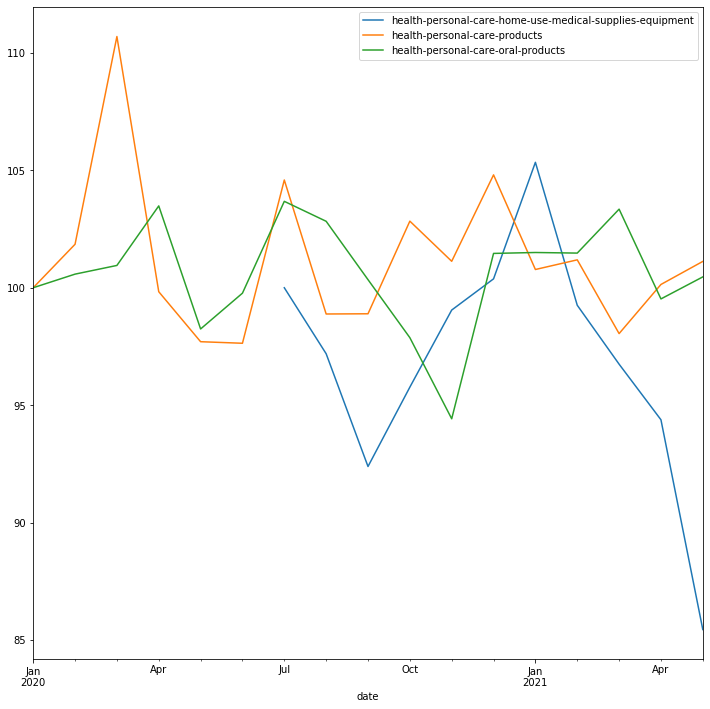

In [180]:
pd.concat(res,axis=1).iloc[:,:8].plot(figsize=(12,12))#.replace({0.:None}).mean(axis=1).plot()

## TODOs:

- look at logarithmic pct changes to make the cumulation more correct
